In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
INDEX_FILE = "D:\\petrtsv\\projects\\ds\\pytorch-sessions\\index.csv"

records = pd.read_csv(INDEX_FILE, index_col=0)
records = records[
    (records['record'] == 15) | 
    (records['record'] == 20) | 
    (records['record'] == 25) | 
    (records['record'] == 30) | 
    (records['record'] == 35) 
]

records

,Name,Explanation,backbone,batch_size,dataset,epochs,frozen_feature_extractor,lr,start_time,test_accuracy,...,pretrained,accuracy,best_iteration,feature_extractor,model,n_iterations,n_shot,n_way,optimizer,task
333,Few-Shot Learning Training,NaN,NaN,16.0,gtsrb,NaN,NaN,NaN,NaN,NaN,...,NaN,0.848229,20.0,resnet18,Baseline,30.0,5.0,5.0,adam,few-shot learning
334,Few-Shot Learning Training,NaN,NaN,16.0,gtsrb,NaN,NaN,NaN,NaN,NaN,...,NaN,0.731771,29.0,resnet18,Baseline,30.0,1.0,5.0,adam,few-shot learning
335,Few-Shot Learning Training,NaN,NaN,16.0,gtsrb,NaN,NaN,NaN,NaN,NaN,...,NaN,0.791250,25.0,resnet18,Baseline++,30.0,5.0,5.0,adam,few-shot learning
336,Few-Shot Learning Training,NaN,NaN,16.0,gtsrb,NaN,NaN,NaN,NaN,NaN,...,NaN,0.692500,29.0,resnet18,Baseline++,30.0,1.0,5.0,adam,few-shot learning
337,Few-Shot Learning Training,NaN,NaN,16.0,gtsrb,NaN,NaN,NaN,NaN,NaN,...,NaN,0.953125,8000.0,resnet18,ProtoNet,10000.0,5.0,5.0,adam,few-shot learning
338,Few-Shot Learning Training,NaN,NaN,16.0,gtsrb,NaN,NaN,NaN,NaN,NaN,...,NaN,0.838125,8000.0,resnet18,ProtoNet,10000.0,1.0,5.0,adam,few-shot learning
339,Few-Shot Learning Training,NaN,NaN,16.0,gtsrb,NaN,NaN,NaN,NaN,NaN,...,NaN,0.786042,8000.0,resnet18,RelationNet,10000.0,5.0,5.0,adam,few-shot learning
340,Few-Shot Learning Training,NaN,NaN,16.0,gtsrb,NaN,NaN,NaN,NaN,NaN,...,NaN,0.519271,9000.0,resnet18,RelationNet,10000.0,1.0,5.0,adam,few-shot learning
342,Few-Shot Learning Training,NaN,NaN,16.0,cifar10,NaN,NaN,NaN,NaN,NaN,...,NaN,0.893854,5.0,resnet18,Baseline,30.0,5.0,2.0,adam,few-shot learning
343,Few-Shot Learning Training,NaN,NaN,16.0,cifar10,NaN,NaN,NaN,NaN,NaN,...,NaN,0.822187,0.0,resnet18,Baseline,30.0,1.0,2.0,adam,few-shot learning


In [3]:
COLUMNS = ['dataset', 'accuracy', 'feature_extractor',
           'n_shot', 'model', 'n_way']

scores = records[COLUMNS]
scores

,dataset,accuracy,feature_extractor,n_shot,model,n_way
333,gtsrb,0.848229,resnet18,5.0,Baseline,5.0
334,gtsrb,0.731771,resnet18,1.0,Baseline,5.0
335,gtsrb,0.791250,resnet18,5.0,Baseline++,5.0
336,gtsrb,0.692500,resnet18,1.0,Baseline++,5.0
337,gtsrb,0.953125,resnet18,5.0,ProtoNet,5.0
338,gtsrb,0.838125,resnet18,1.0,ProtoNet,5.0
339,gtsrb,0.786042,resnet18,5.0,RelationNet,5.0
340,gtsrb,0.519271,resnet18,1.0,RelationNet,5.0
342,cifar10,0.893854,resnet18,5.0,Baseline,2.0
343,cifar10,0.822187,resnet18,1.0,Baseline,2.0


Сценарий (из https://arxiv.org/abs/1904.04232):

1) Разделяем классы датасета на base и test
2) Для Baseline/Baseline++ обучаем модель на всем base, для meta-learning выбираем из base эпизоды (эпизод - выбираем случайный support set, берем несколько изображений для проверки классификации) и обучаем на них модель.
3) Во время теста выбираем из test 600 эпизодов и усредняем точность.

In [4]:
def dataset_stat(dataset: str, n_way: int):
    plt.figure(figsize=(16, 5))

    chart_data = scores[(scores['dataset'] == dataset) & (scores['n_shot'] == 5) & (scores['n_way'] == n_way)]

    plt.subplot(121)
    plt.bar(range(len(chart_data)), chart_data['accuracy'])
    plt.yticks(list(np.linspace(0, 1, 11)))
    plt.xticks(range(len(chart_data)), chart_data['model'])
    plt.title("5-shot accuracy")

    chart_data = scores[(scores['dataset'] == dataset) & (scores['n_shot'] == 1)]

    plt.subplot(122)
    plt.bar(range(len(chart_data)), chart_data['accuracy'])
    plt.yticks(list(np.linspace(0, 1, 11)))
    plt.xticks(range(len(chart_data)), chart_data['model'])
    plt.title("1-shot accuracy")

    plt.suptitle(str(n_way) + "-way few-shot learning on " + dataset)

    plt.show()

# Few-shot learning on GTSRB

Base - 20 classes, 
test - 23 classes

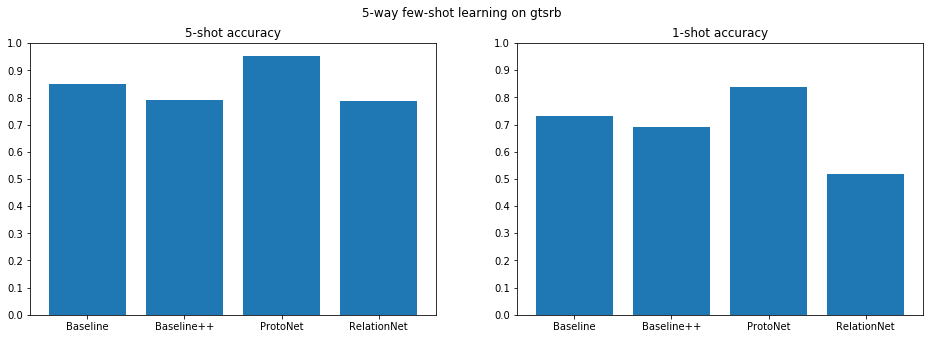

In [5]:
dataset_stat('gtsrb', 5)

# Few-shot learning on CIFAR-10

Base - 8 classes, 
test - 2 classes

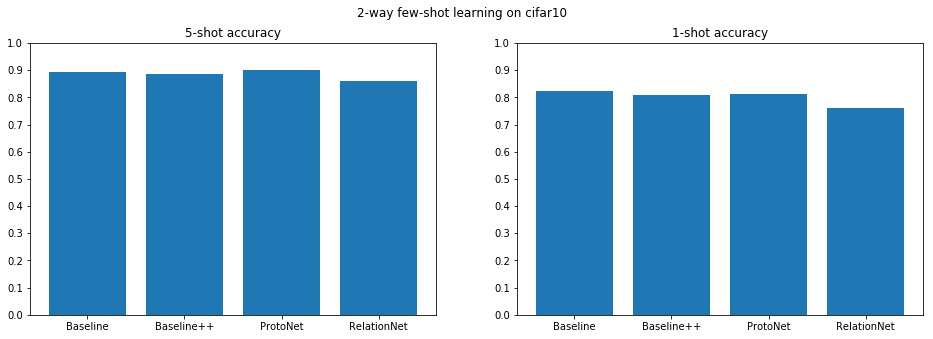

In [6]:
dataset_stat('cifar10', 2)

# Few-shot learning on mini-ImageNet

Base - 80 classes, 
test - 20 classes

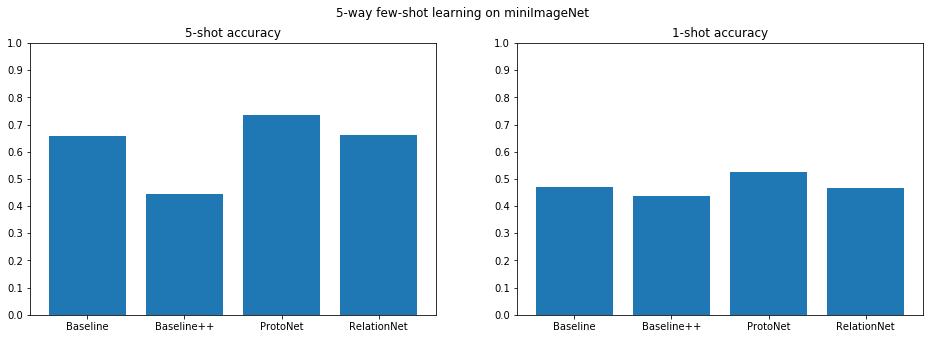

In [7]:
dataset_stat('miniImageNet', 5)